## Imprting libraries

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

## Check available devices

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8676464340175671099
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13936912418732963158
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## Data Splitting

In [ ]:
# loading dataset
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Preprocessing

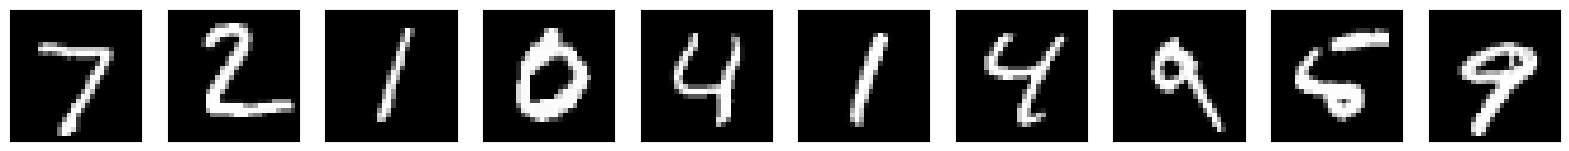

In [ ]:
import matplotlib.pyplot as plt

n = 10 #how many digits we will display
plt.figure(figsize=(20,4))

for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

## Shape of the data

In [ ]:
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", Y_train.shape)
print("X_test Shape: ", X_test.shape)
print("Y_test Shape: ", Y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
Y_test Shape:  (10000,)


## Reshaping the data

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) # 1 channel like 1 color
X_test = X_test.reshape(X_test.shape[0],28,28,1)

## Min-Max Scaling
will see the dataset as 0 and 1 no data will domnate another

In [ ]:
# convert data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values  to a range between 0 and 1
X_train /= 255 # 0 mean black and 255 white
X_test /= 255

## One hot encoding

In [ ]:
from keras.utils import to_categorical

# no of classes in the datset
classes = 10

# convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test =to_categorical(Y_test, classes)

# print the preprocesses and reshaped data
print("Now X_train shape: {} \nNew Y_train shape: {}".format(X_train.shape, Y_train.shape))
print("Now X_test shape: {} \nNew Y_test shape: {}".format(X_test.shape, Y_test.shape))

Now X_train shape: (60000, 28, 28, 1) 
New Y_train shape: (60000, 10)
Now X_test shape: (10000, 28, 28, 1) 
New Y_test shape: (10000, 10)


## Building the CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten # flatten 2d to 1d vectors
from keras.layers import Conv2D, MaxPooling2D


In [ ]:
img_rows, img_cols, channels = 28, 28, 1

# define no of fileters like no neurons we increase no of filters
filters = [6, 32, 80, 120]

# no of classes for classification
classes = 10

In [ ]:
# standars neural network or fully connected neural network(layer by layer)
# container to store layers
model = Sequential()

# input layer
model.add(Conv2D(filters[0], (3,3), padding='same',\
                 activation='relu', input_shape=(img_rows, img_cols, channels))) # 1 color image have 1 channel and for color im 3 channels RGB
model.add(MaxPooling2D(pool_size=(2,2))) # for reducing image size
# (dim+pad-kernel)/2   (28+3-3)/2=14

model.add(Conv2D(filters[1],(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # max pooling mean max value
# (dim+pad-kernel)/2   (14+2-2)/2=7

model.add(Conv2D(filters[2],(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7+2-2)/2=3

model.add(Conv2D(filters[3],(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3+2-2)/2=1

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 80)          0

## Parametrs calculation in CNN
(filter height * filter width * input channels + 10 * number of filters = parametres
- layer1 = (3x3x1+1)x6=60
- layer2 = (2x2x6+1)x32=800

## Training the CNN
whenever dealing with pics use batch size in square of 2 like 32, 64, or 128 ...

In [ ]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
750/750 [==============================] - 10s 8ms/step - loss: 2.0137 - accuracy: 0.3633 - val_loss: 0.9156 - val_accuracy: 0.7319
Epoch 2/15
750/750 [==============================] - 7s 9ms/step - loss: 0.5218 - accuracy: 0.8324 - val_loss: 0.2763 - val_accuracy: 0.9135
Epoch 3/15
750/750 [==============================] - 5s 7ms/step - loss: 0.2500 - accuracy: 0.9235 - val_loss: 0.1774 - val_accuracy: 0.9450
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1728 - accuracy: 0.9473 - val_loss: 0.1311 - val_accuracy: 0.9607
Epoch 5/15
750/750 [==============================] - 5s 6ms/step - loss: 0.1388 - accuracy: 0.9561 - val_loss: 0.1177 - val_accuracy: 0.9632
Epoch 6/15
750/750 [==============================] - 4s 6ms/step - loss: 0.1117 - accuracy: 0.9655 - val_loss: 0.1534 - val_accuracy: 0.9514
Epoch 7/15
750/750 [==============================] - 7s 10ms/step - loss: 0.0977 - accuracy: 0.9697 - val_loss: 0.0937 - val_accuracy: 0.9712
Epoc

## Testing the model

In [ ]:
from sklearn.metrics import accuracy_score

# predict
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# calculate and print the test accuracy
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.9801


1/1 [==============================] - 0s 186ms/step


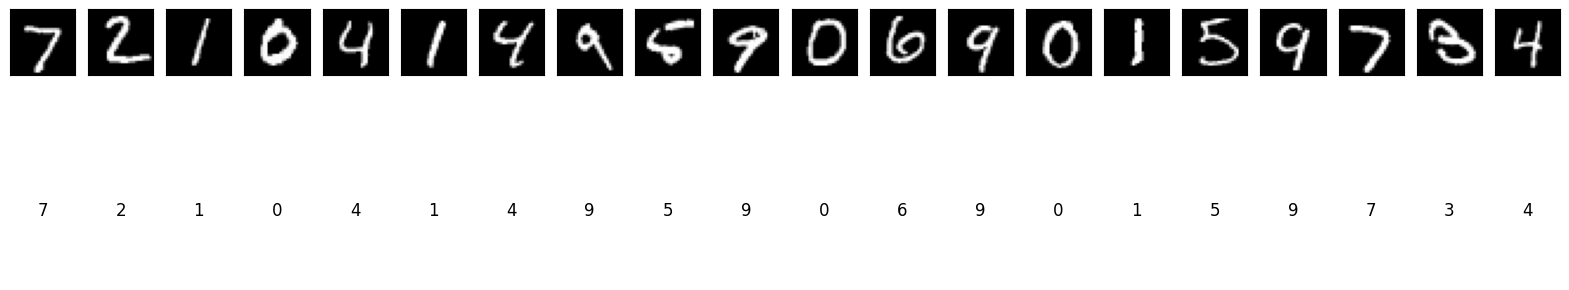

In [ ]:
# define a mask for selecting a dice of ranges(20 to 49)
mask = range(20, 50)

# select the first 20 samples from the test set for viz
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# predict probs for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

# set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display predicted digits
  predicted_digit = np.argmax(y_pred_probs_valid[i])
  ax = plt.subplot(2, n, i+1+n)
  plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
  plt.axis('off')

plt.show()
plt.close()

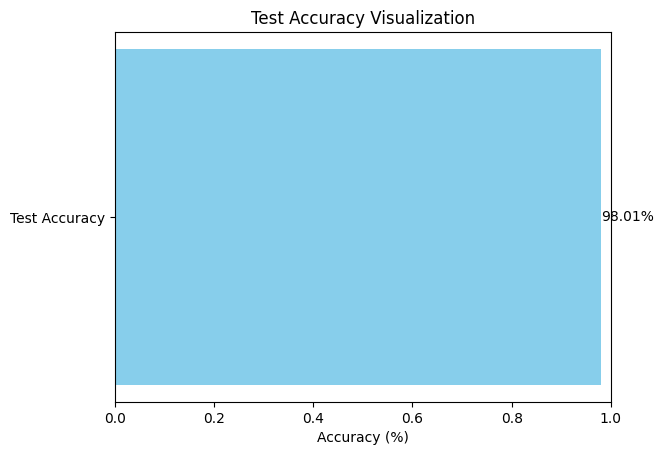

In [ ]:
import matplotlib.pyplot as plt

# Test accuracy value
test_accuracy = 0.9801

# Calculate percentage
percentage_accuracy = test_accuracy * 100

# Create a bar plot with percentage label
plt.barh(['Test Accuracy'], [test_accuracy], color=['skyblue'])
plt.xlabel('Accuracy (%)')
plt.xlim(0, 1)  # Set x-axis limit to represent accuracy range (0 to 1)

# Display percentage within the label
plt.text(test_accuracy, 0, f'{percentage_accuracy:.2f}%', va='center', color='black')

plt.title('Test Accuracy Visualization')
plt.show()
